In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, f1_score, precision_score

In [52]:
data = pd.read_csv('Mesothelioma.csv')
data.drop_duplicates()
data.head()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47,1,0,1,0,20,1,0,1,24.0,...,289,0.0,0.00,79,1,0,0,0,34,0
1,55,1,0,1,0,45,1,0,0,1.0,...,7541,1.6,0.80,6,1,1,1,1,42,0
2,29,1,1,1,0,23,0,1,0,1.0,...,480,0.0,0.00,90,1,0,0,0,43,1
3,39,1,0,1,0,10,1,0,0,3.0,...,459,5.0,2.80,45,1,1,0,0,21,0
4,47,1,0,1,0,10,1,1,1,1.5,...,213,3.6,1.95,53,1,1,0,0,11,0


In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
train_x,test_x=train_test_split(data,test_size=0.1,random_state=2)
train_y=train_x['class of diagnosis'].values
del train_x['class of diagnosis']
test_y=test_x['class of diagnosis'].values
del test_x['class of diagnosis']
train_x=preprocessing.scale(train_x.values)
test_x=preprocessing.scale(test_x.values)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
score=rfc.score(test_x, test_y)
print("随机森林的正确率：",score)
print(rfc.predict(test_x))
print(test_y)

随机森林的正确率： 1.0
[1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0]
[1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0]


In [55]:
x = data.iloc[:,0:34]
y = data.iloc[:,34]
x_train,x_test,y_train,y_test= train_test_split(x.values,y.values,test_size = 0.2,random_state = 123)

In [30]:
print(y_train)

[0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1]


In [17]:
grid_values={'n_estimators':[50,100,200],'max_depth':[None,30,15,5],'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
grid_rfc=GridSearchCV(rfc,param_grid=grid_values,scoring='accuracy')
grid_rfc.fit(x_train,y_train)
score=grid_rfc.score(x_test, y_test)
print("随机森林的正确率：",score)

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,glucose,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP)
220,54,0,6,0,0,0,1,0,0,8.0,...,109,546,3.10,1.40,23,1,1,1,1,58
53,54,1,2,1,0,5,1,0,0,1.0,...,145,1542,5.00,3.00,64,1,1,0,0,102
22,54,0,0,1,0,20,0,0,1,8.0,...,114,384,4.10,2.80,65,1,1,0,0,24
120,66,1,2,1,0,50,0,1,0,1.0,...,141,222,4.10,2.20,55,1,1,0,0,41
181,56,0,6,1,0,41,0,0,0,1.0,...,125,511,3.10,1.20,27,1,1,1,1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,67,1,0,1,0,51,1,1,0,2.0,...,149,544,3.17,1.77,31,1,1,1,1,81
17,57,0,0,1,0,25,1,0,0,12.0,...,105,162,3.10,1.90,68,1,1,1,0,78
230,68,0,0,1,0,44,0,2,0,4.0,...,110,533,4.90,2.10,32,1,1,1,1,81
98,51,1,0,1,0,32,1,1,1,7.0,...,166,356,4.20,2.30,78,1,1,0,0,34


In [18]:
y_train

220    0
53     0
22     1
120    1
181    1
      ..
83     0
17     0
230    1
98     0
322    1
Name: class of diagnosis, Length: 259, dtype: int64

In [10]:
#bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=200)
model = AdaBoostClassifier(random_state = 123)
model.fit(x_train,y_train)

AdaBoostClassifier(random_state=123)

In [11]:
print("建立的弱分类器：",model .estimators_)
print("分类误差：",model.estimator_errors_)
print("样本权重：",model.estimator_weights_)
print("迭代速率：",model.learning_rate)

建立的弱分类器： [DecisionTreeClassifier(max_depth=1, random_state=843828734)]
分类误差： [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
样本权重： [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
迭代速率： 1.0


In [12]:
y_pred = model.predict(x_test) # 模型预测

print("\n---------- 模型评价 ----------")
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
df_cm = pd.DataFrame(cm)              # 构建DataFrame
print("ConfusionMatrix",df_cm)      
print('Accuracy score:', accuracy_score(y_test, y_pred))                       # 准确率
print('Recall:', recall_score(y_test, y_pred, average='weighted'))             # 召回率
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))               # F1分数
print('Precision score:', precision_score(y_test, y_pred, average='weighted')) # 精确度


---------- 模型评价 ----------
ConfusionMatrix     0   1
0  41   0
1   0  24
Accuracy score: 1.0
Recall: 1.0
F1-score: 1.0
Precision score: 1.0


In [13]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [14]:
a = pd.DataFrame()
a['pred'] = list(y_pred)
a['actual'] = list(y_test)
#a.head()
a

,pred,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
60,1,1
61,0,0
62,0,0
63,0,0


In [67]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

1.0

In [68]:
model.score(x_test,y_test)

1.0

In [69]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba 

array([[1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [2.220446

In [70]:
a = pd.DataFrame(y_pred_proba,columns=['0','1'])
a

,0,1
0,1.000000e+00,2.220446e-16
1,1.000000e+00,2.220446e-16
2,1.000000e+00,2.220446e-16
3,1.000000e+00,2.220446e-16
4,2.220446e-16,1.000000e+00
...,...,...
60,2.220446e-16,1.000000e+00
61,1.000000e+00,2.220446e-16
62,1.000000e+00,2.220446e-16
63,1.000000e+00,2.220446e-16


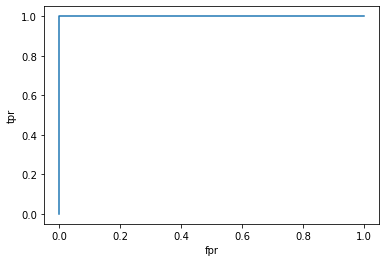

In [72]:
from sklearn.metrics import roc_curve
fpr,tpr,thres = roc_curve(y_test.values,y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

通过如下代码计算模型的AUC值。

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

1.0

可以通过计算各个特征变量的特征重要性来筛选出精准营销中最重要的特征变量，代码如下。

In [54]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=10))
grid_values={'n_estimators':[50,100,200],'learning_rate':[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
grid_ada=GridSearchCV(ada,param_grid=grid_values,scoring='accuracy')
grid_ada.fit(x_train,y_train)
score=grid_ada.score(x_test, y_test)
print("AdaBoost正确率：",score)

AdaBoost正确率： 1.0
